In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
path = "C:\\datasets\\spe\\data-latest.xlsx"
df = pd.read_excel(path, sheet_name='Compliance_Revenue', skiprows=1)

In [32]:
# drop rows with nan values
df = df.dropna()
# drop rows where all the values are either 0 or Not available from te 4th column onwards
df = df[(df.iloc[:, 5:] != 'Not available').all(axis=1)]

In [33]:
# drop the rows where the sum of the values in the columns from 4th column onwards is 0
df = df[df.iloc[:, 5:].sum(axis=1) != 0].reset_index(drop=True)
df = df.drop(columns=['Metric'])
df.head()
df.set_index('Name of the initiative', inplace=True)

In [55]:
df.iloc[:, 5:].head(3)

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total Revenue
Name of the initiative,,,,,,,,,,,,,,,,,,,,,
Finland carbon tax,179.487179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1456.482528,1349.6905,1351.745041,1609.414797,1458.572417,1419.493196,1644.440001,1734.450968,1418.64375,69490.035842
Poland carbon tax,0.856440,0.771435,0.717332,0.808477,0.813571,0.649935,0.612416,0.592368,0.581100,0.806524,...,1.211440,1.21144,1.141992,1.326928,1.218041,5.93572,1.219945,6.623094,1.257744,144.989554
Norway carbon tax,311.907280,417.033268,398.163615,414.864402,398.253160,418.062303,818.536868,720.135068,728.246661,902.429703,...,1500.435962,1544.153265,1498.541527,1812.839837,1650.773454,1454.77404,1759.786039,2157.497427,1507.941053,107168.430097


In [39]:
# covert the values in the columns from 4th column onwards to numeric
df.iloc[:, 0:] = df.iloc[:, 0:].apply(pd.to_numeric, errors='coerce')
df['Total Revenue'] = df.sum(axis=1)

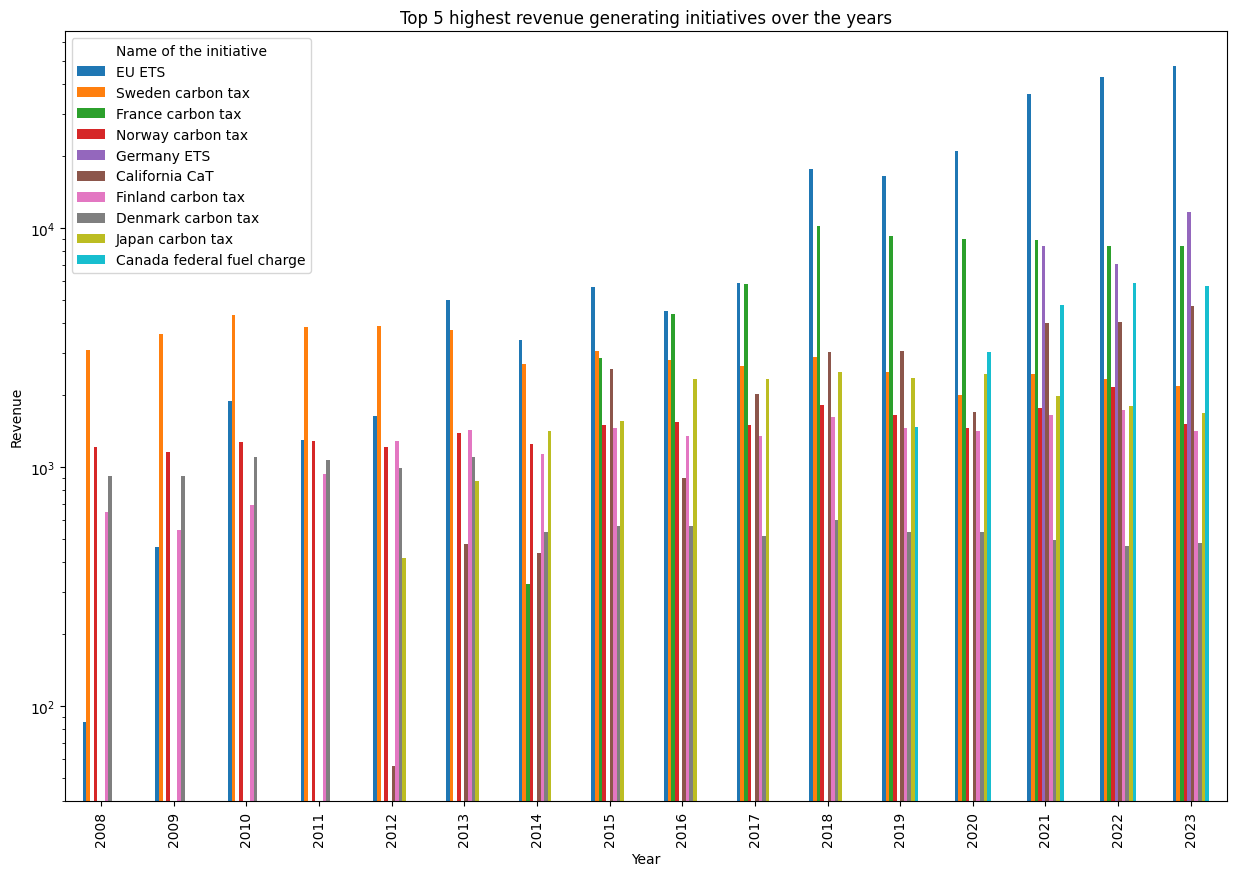

In [54]:
# show the trend of revenue over the years for the top 5 highest revenue generating initiatives
top5 = df['Total Revenue'].sort_values(ascending=False).head(10).index
df_top5 = df.loc[top5, :]
df_top5 = df_top5.iloc[:, 20:]
df_top5 = df_top5.transpose()
# drop last row which is the total revenue
df_top5 = df_top5.iloc[:-1, :]
# show a bar plot for the top 5 highest revenue generating initiatives over the years without the total revenue column
df_top5.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Year')
plt.ylabel('Revenue')
# log on y
plt.yscale('log')
plt.title('Top 5 highest revenue generating initiatives over the years')
plt.show()

In [5]:
# select the rows where the Area is in the selected_areas list
selected_areas = ['Alberta', 'British Columbia', 'Quebec', 'Northwest Territories', 'Canada', 'Prince Edward Island', 'Newfoundland and Labrador', 'New Brunswick']
df = df[df['Jurisdiction Covered'].isin(selected_areas)].reset_index(drop=True)
df

,Name of the initiative,Instrument Type,Jurisdiction Covered,1990,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Alberta TIER,ETS,Alberta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,66.841104,63.922741,103.931938,101.878702,352.077136,391.861591,301.575556,292.280143,475.943095,638.43937
1,BC carbon tax,Carbon tax,British Columbia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,954.646368,932.015023,920.518127,932.385463,1091.88479,1220.663274,1118.731013,2283.326701,1757.113171,1958.17631
2,Quebec CaT,ETS,Quebec,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.804499,651.101989,257.573524,358.854957,497.597186,726.294493,485.264084,895.901313,1069.373402,1048.802952
3,Northwest Territories carbon tax,Carbon tax,Northwest Territories,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,5.23527,13.336146,25.785913,35.13527,42.858198
4,Canada federal fuel charge,Carbon tax,Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,1461.534329,3010.831877,4777.35774,5895.540281,5719.352693
5,Prince Edward Island Carbon tax,Carbon tax,Prince Edward Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,7.047868,9.143982,24.353363,24.034926,10.345082
6,Newfoundland and Labrador carbon tax,Carbon tax,Newfoundland and Labrador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,43.430832,41.042411,78.185436,87.40669,25.862706
7,New Brunswick carbon tax,Carbon tax,New Brunswick,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,0,87.430534,98.487863,127.877238,118.229513


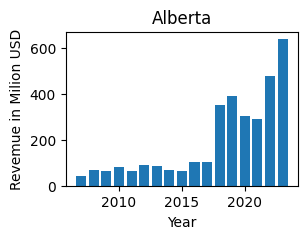

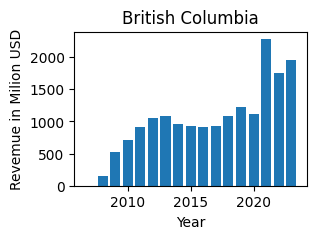

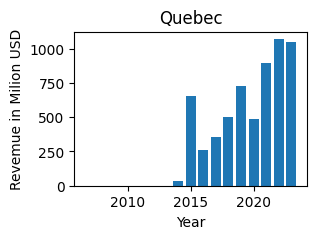

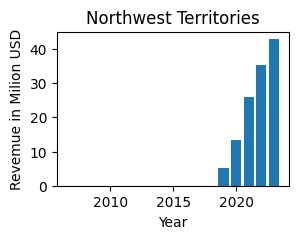

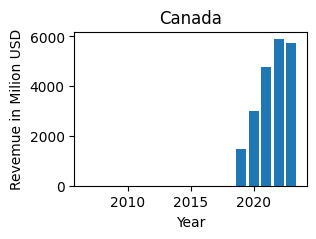

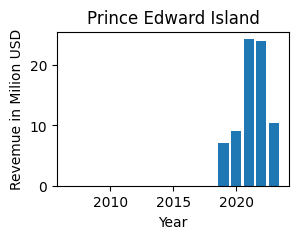

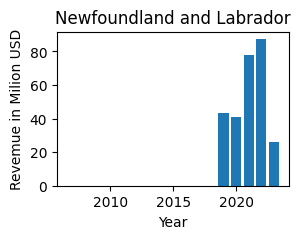

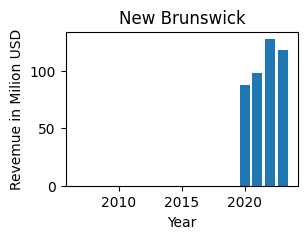

In [6]:
for i in range(0, len(df)):
    plt.bar(df.columns[20:], df.iloc[i, 20:], label=df.iloc[i, 0], figure=plt.figure(figsize=(3, 2)))
    plt.xlabel('Year')
    plt.title(df.iloc[i, 2])
    plt.ylabel('Revemue in Milion USD')
    plt.show()
